# 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

<hr>

# Data Validation

There are 947 rows and 8 columns in the original data. The data is tidy, i.e. each row is a sample and each column is a feature.

## Duplicate samples

Each row of the data has a unique recipe number which implies there are no duplicates. However, I checked for cases where duplicates might exist with different recipe numbers. Two types of these duplicates were investigated:

1. all but recipe columns (ABRC) - samples are considered to be duplicates when they have the same values in all but the `recipe` column of the original data.
2. calories, carbohydrate, sugar, and protein (CCSP) columns - samples are considered to be duplicates when they have the same calories, carbohydrate, sugar, and protein values.

All ABRC duplicates were also found to be CCSP duplicates, In other words, the missing `calories`, `carbohydrate`, `sugar`, and `protein` values are the only columns driving these two types of duplicate record counts. Since there were no duplicate records in the samples that had no missing values and this represents about 94.5% of the data, I assumed that each value in the the recipe column does indeed represent a unique recipe which implies no duplicates exist in the data with missing values as well. **In summary, there are no duplicate records in the data.**

## How each column was preprocessed

Columns are described and processed as follows:
+ **recipe**: This is a number that identifies each recipe.
  + This is neither a predictor or target variable.
  + It's only purpose is as an identifier.
  + There are no missing values.
  + <font color="green">No cleaning is needed.</font>
+ **calories**, **carbohydrate**, **sugar**, **protein** (CCSP): These are calories, grams of carbohydrates, grams of sugar and grams of protein respectively.
  + These are quantitative independent or predictor variables.
  + There are 376 of these values that are inconsistent because they show more calories from carb's, sugar and protien combined than the total calories. This effects about 40% of the samples.
  + It is not known whether `calories` are too low or if `carbohydrate`, `sugar`, and/or `protein` are too high. I assumed that `calories` values are incorrect and dropped this feature. I futher assume that the other three features are correct and kept them in the analysis.
  + The example recipe (tomato soup) specifies that each of these quantities are ***(per serving)***, so it is assumed that each of these values are reported **per serving** as defined by the [FDA](https://www.fda.gov/food/nutrition-facts-label/serving-size-nutrition-facts-label).
  + Except for the inconsistent samples, these values appear to fall within reasonable ranges.
  + Besides the target (which will be discussed later), these are the only columns that have missing values.
  + These values go missing as a group. When any one of these 4 is missing, the other 3 are missing as well.
  + Samples with missing values make up 5.5% (52 out of 947) of the data. This proportion is not quite low enough to justify dropping them, so these values were imputed.
  + Since the available evidence suggest that these values are **Missing at Random (MAR)**, a linear regression model is used to impute the `carbohydrate`, `sugar`, and `protein` missing values.
  + Because the distribution of the `carbohydrate`, `sugar`, and `protein` (CSP) values are skewed right, a (natural) log transformation was applied to them as part of building the imputation model. The untransformed values are later used as predictors when building the logistic regression and decision tree models to predict whether recipes will be high traffic or not.
+ **category**: This a general categorical designation of the recipe. The data dictionary describes 10 categories. However, 11 categories where actually found in the original data:  
*Beverages*, *Breakfast*, *Chicken*, *Chicken Breast <font color="red">(not in data dictionary)</font>*, *Dessert*, *Lunch/Snacks*, *Meat*, *One Dish Meal*, *Pork*, *Potato*, *Vegetable*
  + This is a categorical independent or predictor variable with 11 levels (described above).
  + I decided not to combine the *Chicken* and *Chicken Breast* categories because the later was found (see EDA section) to correspond to a larger portion of the positive (**High**) class.
  + Because this is a categorical variable with no oridinal relationship between the levels, they were one-hot encoded prior to creating the models.
  + The space and / in categories like `Chicken Breast`, `Lunch/Snack` and `One Dish Meal` were removed for convenience in naming the encoded levels.
+ **servings**: As defined by the [FDA](https://www.fda.gov/food/nutrition-facts-label/serving-size-nutrition-facts-label), a serving is a standard unit of measure based on the amount of food people typically consume
  + This is a quantitative independent or predictor variable.
  + Values for this variable are 1, 2, 4, and 6.
  + Values were converted from strings to numbers (integers).
  + Two values are listed as "4 as a snack" and one as "6 as a snack" in the original data. The *... as a snack* samples are dropped from the data for the following reasons:
    1. The phrase *"as a snack"* typically implies somethings smaller than a normal *serving*, but by how much is ambiguous.
    2. Out of 947 total, 3 samples represents less than 1/2 percent of the data.
    3. This variable is not expected to be a strong predictor because recipe portions can be adjusted to make more or less, so it only serves to provide additional information.
+ **high_traffic**: This is the target or the dependent variable we want to predict.
  + Original data contains either the word *High* (positive class) or is a missing value (assumed to be the negative class).
  + Because missing values are assumed to be the negative class, they were initally imputed as *NOT High*.
  + Values were later converted from strings into binary values where: **1 = High traffic** and **0 = NOT High traffic**
  + A little over 1/3 of the values are ***NOT High***, so no serious class imbalance exists.

## Data validation assumptions
+ Although at least 376 samples have problematic values for `calories`, `carbohydrate`, `sugar`, and `protein`, the `category` and `high_traffic` columns are assumed to be accurate
+ The `calories` column was assumed to be the only problem with the `calories`, `carbohydrate`, `sugar`, and `protein` group of variables, so the `calories` feature was dropped and the other 3 were retained.
+ All the missing values in the `high_traffic` column are not actually missing values. They represent recipes that are **NOT** *High* traffic.
+ The `Chicken` and `Chicken Breast` categories are mutually exclusive. In other words, all of the `Chicken` recipes use other parts of the chicken besides the breast meat (e.g. thighs, wings, drumsticks, etc.)
+ The values for **calories**, **carbohydrate**, **sugar** and **protein** are listed **per serving** as described in the example provided with the data dictionary.

## Data validation summary

1. Data provided contained 947 rows (samples) with each row representing a recipe.
2. No duplicate recipes were found.
3. Each row contained 8 columns (features): `recipe, calories, carbohydrate, sugar, protein, category, servings` and `high_traffic`
4. Each row represents a recipe and is identified by a unique number from 1 to 947 in the `recipe` column. No cleaning of this column was required.
5. The `calories` column was assumed to be the total calories per serving. These values were inconsistent with the `carbohydrate`, `sugar`, and `protein` columns in that 40% of the samples had more calories from (carbohydrates + sugar + protein) than there were total calories. This column was dropped from consideration as a feature in this analysis because of the inconsistency.
6. The `carbohydrate`, `sugar`, and `protein` columns are numbers representing the grams of each per serving in each recipe. Missing data for these values occurred as a group where all 3 of these values were either all present or all 3 were missing.  There were 52 rows/samples where these values were missing representing 5.5% of the data. Because missing values exceeded 5%, these values were imputed in the **Model Development** section.
7. To select an appropriate imputation method, the type of missingness needed to be determined. The strongest evidence for the missing data in the `carbohydrate`, `sugar`, and `protein` columns is that it is **Missing at Random (MAR)**.
8. The `category` columns represent the recipe type. The project documentation listed 10 unique categories, but 11 were found in the data. The ***Chicken Breast*** was not listed in the documentation and was assumed to be mutually exclusive of the ***Chicken*** category. <font color="red"><b>This assumption should be confirmed by the team.</b></font>. No cleaning of this column was required, but they were one-hot encoded just prior to model building.
9. The `servings` column contained the following string values: "1", "2", "4", "6", "4 as a snack", and "6 as a snack". Three samples contained the phrase "as a snack". These samples were dropped because they represented less the 0.5% of the data. The remaining values were converted to a number (integer).
10. The `high_traffic` column is the target variable we are modeling. It contained either a sting value **High** or was empty (missing value). The missing values were assumed to be recipes that were **not** high traffic and were replaced with the string **NOT High**.  The **High** and **NOT High** values were later encoded as 1 and 0 respectively just prior to model building.
11. The `high_traffic` target showed mild class imbalance which informed the model development metric.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime as dt
# for imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import BayesianRidge
# for model development
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split, \
                                    RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score
from sklearn.utils import resample

In [2]:
# read data and see how it comes in
df = pd.read_csv('../data/recipe_site_traffic_2212.csv')
df.info()
print(f"\nRecipes numbers range from {df['recipe'].min()} to {df['recipe'].max()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB

Recipes numbers range from 1 to 947


## Fixing the `high_traffic` values and checking for duplicates

As described above, two types of duplicates are investigated which differ by different groups of columns: 1) all but recipe columns (ABRC) and 2) calories, carbohydrate, sugar, and protein (CCSP) columns. The only duplicates that were found had different recipe numbers but had missing CCSP values. This lead me to conclude that each recipe was indeed unique and that there are no duplicate samples in the data. The next few cells validate this observation.

The first step in exploring duplicates was to fix the `high_traffic` (target) column because missing values in this column are assumed to have a specific meaning (NOT High traffic).

In [3]:
print(df.head(), '\n')
print(df['high_traffic'].value_counts(dropna=False), '\n')

   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN   

high_traffic
High    574
NaN     373
Name: count, dtype: int64 



In [4]:
# fix missing values in high_traffic column which we assume are are 'NOT High'
df['high_traffic'] = df['high_traffic'].fillna('NOT High')
print(df['high_traffic'].value_counts(dropna=False))

high_traffic
High        574
NOT High    373
Name: count, dtype: int64


In [5]:
# check for duplicate CCSP and ABRC groupings
ccsp = ['calories', 'carbohydrate', 'sugar', 'protein']
abrc = ccsp + ['category', 'servings', 'high_traffic']  # all but recipe column

In [6]:
dupes_abrc = df.duplicated(subset=abrc, keep=False)
dupes_ccsp = df.duplicated(subset=ccsp, keep=False)
abcr_and_ccsp = np.logical_and(dupes_abrc, dupes_ccsp)
print(f"Number of unique recipes: {df['recipe'].nunique()} out of {df.shape[0]} rows/samples of data")
print(f"Number of CCSP duplicates:                          {int(dupes_ccsp.sum())}")
print(f"Number of ABRC duplicates:                          {int(dupes_abrc.sum())}")
print(f"Number of ABRC duplicates that are CCSP duplicates: {int(abcr_and_ccsp.sum())}")

Number of unique recipes: 947 out of 947 rows/samples of data
Number of CCSP duplicates:                          52
Number of ABRC duplicates:                          36
Number of ABRC duplicates that are CCSP duplicates: 36


## Clean the `servings` columns

The non-missing data needs to be cleaned up before imputing the missing values. The `servings` column originally shows string values of 1, 2, 4, 6 for most of the sample. However, two samples with *"4 as a snack"* and a single sample with *"6 as a snack"* also show up. As described above, the three total *"x as a snack"* samples were dropped and this column was converted to numeric (integer).

In [7]:
# look at the servings column
print(df['servings'].value_counts(dropna=False).sort_index(), '\n')
# remove the "as a snack" samples
df = df.loc[~df['servings'].str.contains("as a snack")].copy()
# verify records are dropped and column converted to integer
df['servings'] = df['servings'].astype("int")
print(df['servings'].value_counts(dropna=False).sort_index(), '\n')

servings
1               175
2               183
4               389
4 as a snack      2
6               197
6 as a snack      1
Name: count, dtype: int64 

servings
1    175
2    183
4    389
6    197
Name: count, dtype: int64 



## Clean the categories

The next cell was not strictly needed, but was done to improve readability later when they the `category` variable was one-hot encoded.

In [8]:
df['category'] = df['category'].apply(lambda x: x.replace(' ', '') if ' ' in x else x)
df['category'] = df['category'].apply(lambda x: x.replace('/', '') if '/' in x else x)
df['category'].value_counts()

category
Breakfast        106
ChickenBreast     98
Beverages         92
Potato            88
LunchSnacks       86
Pork              84
Vegetable         83
Dessert           83
Meat              79
Chicken           74
OneDishMeal       71
Name: count, dtype: int64

In [9]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NOT High
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NOT High


## Validating quantitative predictors

### Problems with `calories` data

If the `calories` data is truly per serving as is described in the example provided for this project, then 376 samples have inconsistencies in their `calories`, `carbohydrate`, `sugar`, and `protein` values. [There are roughly 4 calories per gram of carbohydrate, protein](https://www.nal.usda.gov/programs/fnic), or [sugar](https://fdc.nal.usda.gov/food-details/169655/nutrients) according the USDA. If we add up the `carbohydrate`, `sugar`, and `protein` columns and multiply by 4, this value should be **less than the total calories shown in the calories column**. Unfortunately, there are 376 samples in the data where **the total calories per serving is less than the calories per serving from carbohydrate, sugar, and protein combined.** 

### Summary of quantitative predictors

+ There are 376 samples <font color="red">(red shaded area of historgram)</font> that have more calories from carbohydrates, sugar and protein than total calories.
+ The `calories` column is dropped, but the `carbohydrates`, `sugar` and `protein` columns are assumed to be ok.
+ All provided data variables are positive.
+ Samples values appear to be within a reasonable range.
+ A few samples seem very high, but not extreme enough to justify dropping them.

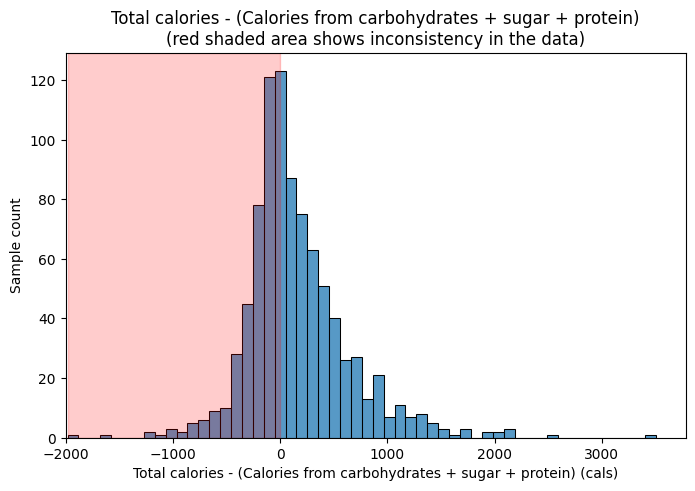

In [10]:
# create df with samples that have no missing values
df_no_missing = df.dropna().copy()

# check if calories are consistent
cal_per_gram = 4.
df_no_missing['non_csp_cals'] = df_no_missing['calories'] - \
                                 (cal_per_gram * (df_no_missing['carbohydrate'] + \
                                                  df_no_missing['sugar'] + \
                                                  df_no_missing['protein']))
# There should be no negative values in this histogram, but there are...
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_no_missing['non_csp_cals'], ax=ax)
ax.set_xlabel("Total calories - (Calories from carbohydrates + sugar + protein) (cals)")
ax.set_ylabel("Sample count")
ax.set_title('Total calories - (Calories from carbohydrates + sugar + protein)\n(red shaded area shows inconsistency in the data)')
# Add shading for the region where x is less than 0
ax.axvspan(xmin=df_no_missing['non_csp_cals'].min(), xmax=0, 
           color='red', alpha=0.2, label='Potential Data Error')
ax.set_xlim(left=-2000)

plt.show()

In [11]:
df_neg_cals = df_no_missing.loc[df_no_missing['non_csp_cals'] < 0, :]
print(f"\nThere are {df_neg_cals.shape[0]} samples that have more calaries from carbs, sugar and protein then there are total calories.\n")
print(df_neg_cals.describe())
df_neg_cals.head()


There are 376 samples that have more calaries from carbs, sugar and protein then there are total calories.

           recipe    calories  carbohydrate       sugar     protein  \
count  376.000000  376.000000    376.000000  376.000000  376.000000   
mean   477.585106  151.507314     50.669920   12.335612   30.731915   
std    277.288756  154.544433     56.910574   19.446504   46.045435   
min      2.000000    0.140000      0.130000    0.010000    0.000000   
25%    228.750000   44.715000     15.495000    2.080000    3.750000   
50%    486.500000  100.825000     33.200000    5.380000   12.060000   
75%    726.250000  208.645000     61.790000   12.577500   38.517500   
max    947.000000  960.750000    530.420000  148.750000  363.360000   

         servings  non_csp_cals  
count  376.000000    376.000000  
mean     3.510638   -223.442473  
std      1.682821    238.399108  
min      1.000000  -1982.160000  
25%      2.000000   -283.630000  
50%      4.000000   -158.155000  
75%      4.00

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,non_csp_cals
1,2,35.48,38.56,0.66,0.92,Potato,4,High,-125.08
3,4,97.03,30.56,38.63,0.02,Beverages,4,High,-179.81
6,7,183.94,47.95,9.75,46.71,ChickenBreast,4,NOT High,-233.70
9,10,248.28,48.54,3.99,113.85,Chicken,2,NOT High,-417.24
13,14,25.23,11.51,10.32,9.57,Vegetable,4,High,-100.37


In [12]:
# convert categorical category column so we can account for missing categories if they arise
cats=sorted(list(df['category'].unique()))
all_categories = pd.CategoricalDtype(cats, ordered=True)
df['category_cat'] = df['category'].astype(all_categories)
# inspect remaining quantitative variables
print(df_no_missing.shape)
df_no_missing[['carbohydrate', 'sugar', 'protein', 'servings']].describe()

(892, 9)


,carbohydrate,sugar,protein,servings
count,892.000000,892.000000,892.000000,892.000000
mean,35.062971,9.043206,24.142018,3.454036
std,44.005332,14.699529,36.429244,1.736618
min,0.030000,0.010000,0.000000,1.000000
25%,8.320000,1.687500,3.177500,2.000000
50%,21.480000,4.545000,10.775000,4.000000
75%,44.907500,9.800000,30.015000,4.000000
max,530.420000,148.750000,363.360000,6.000000


In [13]:
# target class counts for non-missing
high_no_missing = df_no_missing['high_traffic'].value_counts()
print(f"Target class counts with no missing samples:\n{high_no_missing}\n")
print(f"Proportion High with no missing samples: {high_no_missing['High']/(high_no_missing['High']+high_no_missing['NOT High'])}")

Target class counts with no missing samples:
high_traffic
High        533
NOT High    359
Name: count, dtype: int64

Proportion High with no missing samples: 0.5975336322869955


## Missing Values

As described above, we can see that there are 52 samples with missing values for `calories`, `carbohydrate`, `sugar` and `protein`. The matrix plot in the next cell and the code cell that follows it both validate that when any of these values are missing, the other 3 are missing as well. Missing values make up roughly 5.5% of the data. This is above the 5% threshold below which is typically considered acceptable to drop data. This means that imputation of the missing values will need to be done. The choice of imputation method is best informed by the type of missingness that characterizes the data and will be discussed in this section.

## Types of missingness

Before selecting an imputation method, the ***type of missingness*** needs to be determined. A description of each of these three types is shown below.

1. **Missing Completely at Random (MCAR)** - Data is MCAR when the probability of a value being missing is entirely independent of any observed or unobserved data (e.g., a sensor randomly fails).  
2. **Missing at Random (MAR)** - Data is MAR when missingness is related to other observed variables but not to the missing value itself (e.g., men are less likely to report their weight, but weight missingness is explained by recorded gender).  
3. **Missing Not at Random (MNAR)** - Data is MNAR when the reason for missingness is related to the missing value itself (e.g., people with high incomes refuse to report them). This is the most difficult type to handle because the data contains "non-ignorable" bias.  

## Distribution of missing values

To get a sense of the type of missingness in the data, a good place to start is looking at how missing values are related to other variables. We see the following patterns in the data:

+ The matrix plot shows that only the `calories`, `carbohydrate`, `sugar` and `protein` columns have missing values. It also suggests that when there are missing values, all 4 of these are missing at once. This observation is confirmed by counting all the samples that have **any** missing values and comparing this to the number of samples that have **all 4 of** these values missing. Since these counts are equal, we can be certain that all samples that have missing values also have all 4 of these values missing.
+ Samples with `Beverage` or `Breakfast` categories don't have any missing values. In other words, missing values only occur in samples with the following categories:   `Chicken`, `Chicken Breast`, `Dessert`, `Lunch/Snacks`, `Meat`, `One Dish Meal`, `Pork`, `Potato`, `Vegetable`
+ All the missing values in the `Pork`, `Potato` and `Vegetable` categories only occur in **High** traffic samples.

## Evidence for MCAR

If missing values were *Missing Completely At Random*, we would expect to see missing values randomly distributed across all columns of the data. Instead, we only see missing values in four columns. We would also expect that the proportion of missing values in each category would be similar to the proportion of samples in each category in the overall data. Two observations suggest neither is the case:

1. The `Beverage` or `Breakfast` categories are the **1st** and **3rd** most frequent categories in the data, yet there are no missing values in samples from either of these categories.
2. The number of missing values that are in the `Pork` category is over 2X the count of missing values in any other category.

## Evidence for MNAR

There is no evidence that samples are Missing Not At Random.

## Evidence for MAR

Running Chi-Squared tests for independence between:

1. `category` and ***missing (CCSP) values***
2. `high_traffic` and ***missing (CCSP) values***

both suggest that neither `category` or `high_traffic` are independent of ***missing (CCSP) values*** which implies that they are dependent. Although some of the expected counts in the `category` test are below 5 (requirement for Chi-Squared tests), all the evidence combined suggests that of the three types of missingness, the data is most likely **MAR**.

Details regarding how the data was imputed will be described at the beginning of the **Model Development**.


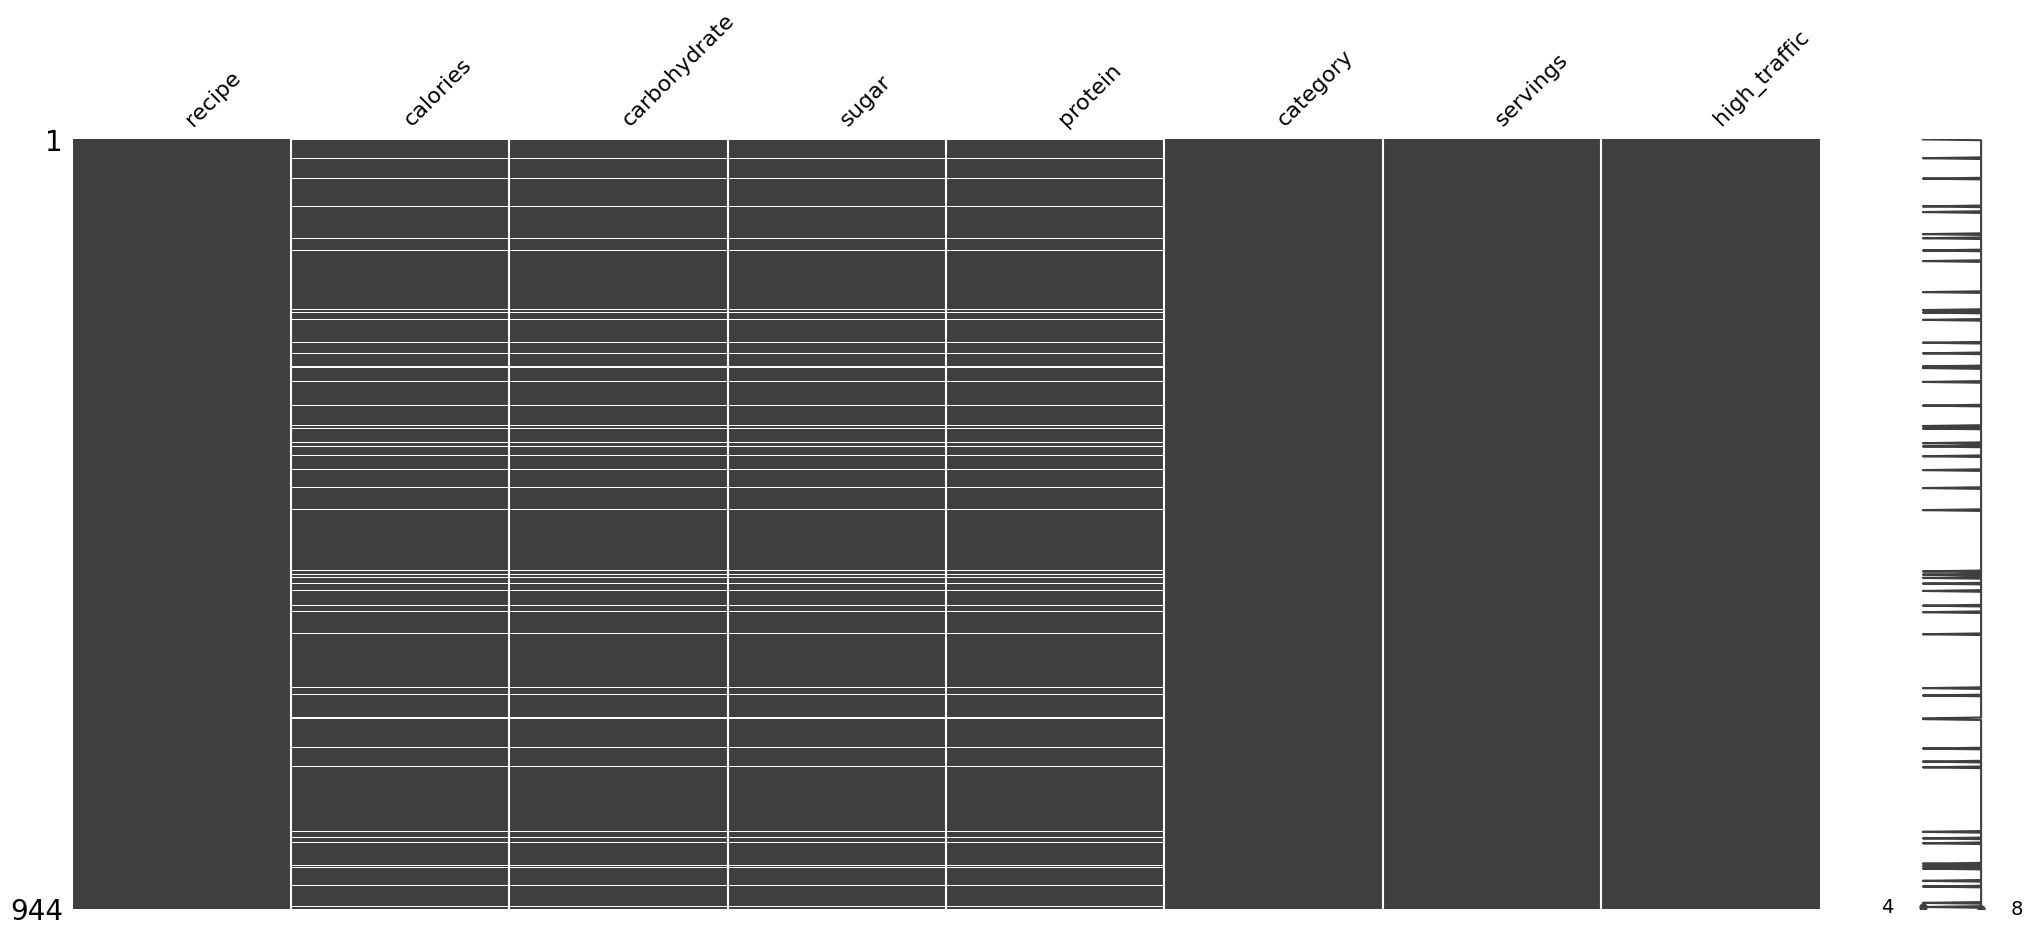

In [14]:
# matrix plot of missing values - all missing values are in the calories, carbohydraate, sugar and protien columns
msno.matrix(df.drop('category_cat', axis=1))
plt.show()

In [15]:
# validate missing values always have the same 4 missing features
df_any_missing = df.loc[~df['recipe'].isin(df_no_missing['recipe'])].sort_values(by = 'recipe').copy()
# print(f"Target class counts with no missing samples:\n{df_any_missing['high_traffic']}\n")
# check if either calories, carbohydrate, sugar or protein (ccsp) are missing, they are all missing
csp_missing = np.where(
    (df_any_missing['calories'].isna()) &
    (df_any_missing['carbohydrate'].isna()) &
    (df_any_missing['sugar'].isna()) & (df_any_missing['protein'].isna())
)[0]

# validate that rows with any missing values are the same as having ccsp all missing
print(f"                                          Count of rows with ANY missing values: {df_any_missing.shape[0]}")
print(f"Count of rows with calories, carbohydrate, sugar and protein (ccsp) all missing: {len(csp_missing)}")

                                          Count of rows with ANY missing values: 52
Count of rows with calories, carbohydrate, sugar and protein (ccsp) all missing: 52


In [16]:
# how do target levels distribute across category in missing samples?
cat_target_missing = pd.crosstab(df_any_missing['category_cat'], df_any_missing['high_traffic'], dropna=False)
df_cat_target_missing = cat_target_missing.reset_index()
# remove the 'high_traffic' name from the column axis
df_cat_target_missing.columns.name = None
df_cat_target_missing['Total Missing'] = df_cat_target_missing['High'] + df_cat_target_missing['NOT High']
print(df_cat_target_missing)
# print(df_cat_target_missing.columns)  # Index(['category_cat', 'High', 'NOT High'], dtype='object')

     category_cat  High  NOT High  Total Missing
0       Beverages     0         0              0
1       Breakfast     0         0              0
2         Chicken     2         3              5
3   ChickenBreast     2         2              4
4         Dessert     5         1              6
5     LunchSnacks     5         2              7
6            Meat     3         2              5
7     OneDishMeal     1         3              4
8            Pork    11         0             11
9          Potato     5         0              5
10      Vegetable     5         0              5


In [17]:
# how do target levels distribute across category in non-missing samples?
cat_target_no_missing = pd.crosstab(df_no_missing['category'], df_no_missing['high_traffic'], dropna=False)
df_cat_target_no_missing = cat_target_no_missing.reset_index()
# remove the 'high_traffic' name from the column axis
df_cat_target_no_missing.columns.name = None
df_cat_target_no_missing['Total NOT Missing'] = df_cat_target_no_missing['High'] + df_cat_target_no_missing['NOT High']
print(df_cat_target_no_missing)
# print(df_cat_target_no_missing.columns)  # Index(['category_cat', 'High', 'NOT High'], dtype='object')

         category  High  NOT High  Total NOT Missing
0       Beverages     5        87                 92
1       Breakfast    33        73                106
2         Chicken    25        44                 69
3   ChickenBreast    44        50                 94
4         Dessert    48        29                 77
5     LunchSnacks    50        29                 79
6            Meat    56        18                 74
7     OneDishMeal    51        16                 67
8            Pork    66         7                 73
9          Potato    78         5                 83
10      Vegetable    77         1                 78


In [18]:
# build the contingecy table for the Chi^2 test for independence between category and missing values
cat_ind_test = pd.concat([df_cat_target_no_missing['category'], df_cat_target_no_missing['Total NOT Missing'], df_cat_target_missing['Total Missing']], axis=1)
cat_ind_test

,category,Total NOT Missing,Total Missing
0,Beverages,92,0
1,Breakfast,106,0
2,Chicken,69,5
3,ChickenBreast,94,4
4,Dessert,77,6
5,LunchSnacks,79,7
6,Meat,74,5
7,OneDishMeal,67,4
8,Pork,73,11
9,Potato,83,5


In [19]:
# set up and run the test
observed_array_t1 = cat_ind_test[['Total Missing', 'Total NOT Missing']].values
chi2_t1, p_t1, dof_t1, expected_scipy_t1 = stats.chi2_contingency(observed_array_t1)
print("SciPy Expected:\n", expected_scipy_t1, '\n')
print(f"\nH0: category and missing values are independent. p-value = {round(p_t1, 4)}, so reject H0 at alpha=0.05. Values are NOT independent (dependent).\n")

# build the contingecy table for the Chi^2 test for independence between high_traffic and missing values
traffic_missing = df_cat_target_missing[['High', 'NOT High']].sum(axis=0)
traffic_no_missing = df_cat_target_no_missing[['High', 'NOT High']].sum(axis=0)

traffic_ind_test = pd.concat([traffic_missing, traffic_no_missing], axis=1)
traffic_ind_test.columns = ['Total Missing', 'Total NOT Missing']
# check expected values
traffic_ind_test

SciPy Expected:
 [[  5.06779661  86.93220339]
 [  5.83898305 100.16101695]
 [  4.07627119  69.92372881]
 [  5.39830508  92.60169492]
 [  4.5720339   78.4279661 ]
 [  4.73728814  81.26271186]
 [  4.35169492  74.64830508]
 [  3.91101695  67.08898305]
 [  4.62711864  79.37288136]
 [  4.84745763  83.15254237]
 [  4.5720339   78.4279661 ]] 


H0: category and missing values are independent. p-value = 0.01, so reject H0 at alpha=0.05. Values are NOT independent (dependent).



,Total Missing,Total NOT Missing
High,39,533
NOT High,13,359


In [20]:
# set up and run the test
observed_array_t2 = traffic_ind_test[['Total Missing', 'Total NOT Missing']].values
chi2_t2, p_t2, dof_t2, expected_scipy_t2 = stats.chi2_contingency(observed_array_t2)
# print("SciPy Expected:\n", expected_scipy_t2, '\n')
print(f"\nH0: traffic (target) and missing values are independent. p-value = {round(p_t2, 4)}, so reject H0 at alpha=0.05. Values are NOT independent (dependent).")


H0: traffic (target) and missing values are independent. p-value = 0.0412, so reject H0 at alpha=0.05. Values are NOT independent (dependent).


# Exporatory [Data] Analysis (EDA)

In this section, the characteristics of each predictor and the relationships between the predictors (independent variables) and the target (dependent variable) are explored.

## `category` counts and target proportions

+ From the plot titled ***Sample Count by Category***, we see that there are roughly similar counts across all categories.
+ From the plot titled ***Impact of Category on Target***, it is clear that `category` has a very strong influence on whether a recipe generates high traffic or not.
+ The following 5 categories had high traffic rates 80% or greater: *Vegetable, Potato, Pork, One Dish Meal and Meat*

## `servings` counts and target proportions

+ From the plot titled ***Fraction of High Traffic by Serving Size (all categories)***, we don't see much change in high traffic recipes for different servings.
+ The plot titled ***Fraction of High Traffic vs. Serving Size by Category*** drills down to see if the distribution of high traffic recipes by category is influenced by serving size and it doesn't look it does to any significant degress.
+ Both of these plots suggests that the `servings` variable doesn't contain much information about the recipe popularity and won't contribute significantly to a model's predictive power.

## Histograms of `carbohydrate`, `sugar` and `protein`

+ `calories` was dropped from consideration starting in this section
+ All 3 real value feature plots are similarly shaped and are not normal.
+ These all show serious right skew (longer right tail than left).

## Boxplot of `carbohydrate`, `sugar` and `protein` by target

The 3 combined boxplots were constructed to see how each of these features correlate with the target. The outliers (aka *fliers* in the documentation) are not shown so that the difference in medians could more clearly be seen

+ Slightly higher median counts of ***High*** traffic recipes are associated with **higher** values of the `carbohydrate` and `protein` features.
+ Slightly higher median counts of ***High*** traffic recipes are associated with **lower** values of `sugar`.
+ The long top whiskers on each of these plots confirms the serious right skew mentioned in the **Histograms of...** section above.

## Performance of the human selection process

A distribution of bootstrap replicated mean high-traffic rates of the current human-driven selection process is constructed to compare against the models that are built in the ***Models*** section. This distribution was constructed from samples that did not have any missing values.

+ The 95% confidence interval of the current human-driven selection process of selecting a ***High*** traffic recipe is between 56.5% and 63.0%

## Feature engineering

From the ***Continuous feature pairs by target class*** plots, we don't seee good separation of target class levels in any pairs of the `carbohydrate`, `sugar` or `protein` features. 
None of the plots of each combination of the `carbohydrate`, `sugar` and `protein` features showed good separation between the two levels of the target class.


## EDA summary

1. Values in the `category` column are somewhat evenly distributed among the levels.
2. The `category` feature displays a strong relationship with whether a recipe will be high traffic or not.
3. The `servings` feature showed no relationship to whether a recipe will be high traffic or not.
4. The distribution of the `carbohydrate`, `sugar` and `protein` values are a noticeably right skewed (long right tail).
5. Higher values of `carbohydrate` and `protein` may be associated with a slight increase in whether a recipe will be ***High*** traffic.
6. Lower values of `sugar` may be associated with a slight incease in whether a recipe will be ***High*** traffic.
7. In 95% of predictions made, the ***Human selection process*** selected **High** traffic recipes between 56.5% and 63% of the time.
8. No pairs of the `carbohydrate`, `sugar` or `protein` features showed a good separation of the target classes implying that they will not be informative model features.
9. Three engineered features were constructed based on the findings in the plots titled ***Distibutions of Carbohydrate, Sugar and Protein By Target Class Level***. These features were evaluated visually to infer whether they might be informative model features. Unfortunately, none of them could be shown to signficantly separate the target class levels.


In [21]:
# sample counts and high counts by category
df_cat_high = df_no_missing.groupby(['category', 'high_traffic'], observed=False)['high_traffic'].count()
# convert to df with a single index
df_cat_high_pivot = df_cat_high.unstack(level=1)
df_cat_high_pivot.reset_index()
df_cat_high_pivot.columns.name = None
df_cat_high_pivot['High_proportion'] = df_cat_high_pivot['High'] / (df_cat_high_pivot['High'] + df_cat_high_pivot['NOT High'])
df_cat_high_pivot['Total Samples'] = df_cat_high_pivot['High'] + df_cat_high_pivot['NOT High']
df_cat_high_pivot.head()

,High,NOT High,High_proportion,Total Samples
category,,,,
Beverages,5,87,0.054348,92
Breakfast,33,73,0.311321,106
Chicken,25,44,0.362319,69
ChickenBreast,44,50,0.468085,94
Dessert,48,29,0.623377,77


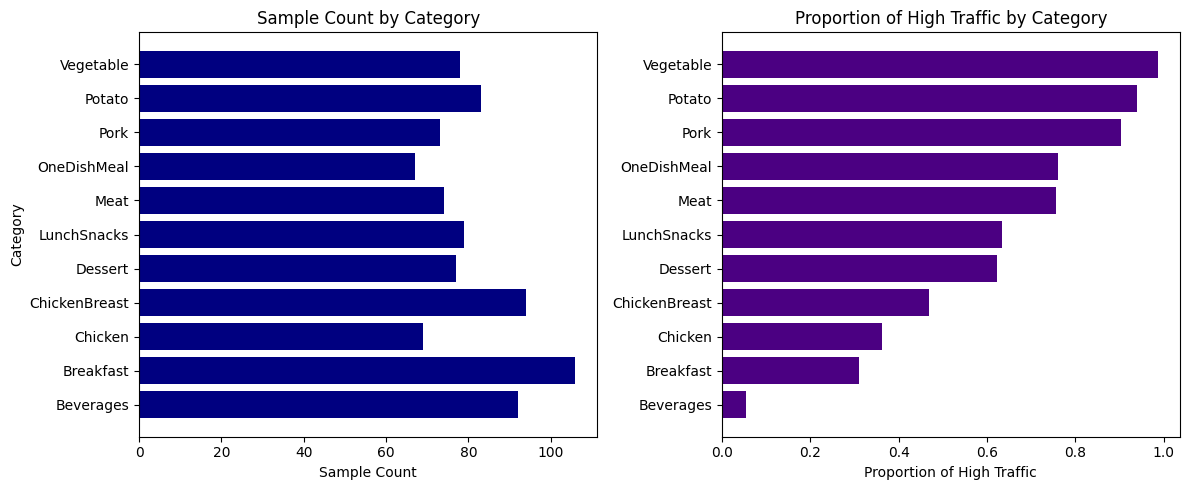

In [22]:
fig0, ax0 = plt.subplots(1, 2, figsize=(12, 5))

ax0[0].barh(df_cat_high_pivot.index, df_cat_high_pivot['Total Samples'], color='navy')
ax0[1].barh(df_cat_high_pivot.index, df_cat_high_pivot['High_proportion'], color='indigo')

ax0[0].set_ylabel('Category')
ax0[0].set_xlabel('Sample Count')
ax0[1].set_xlabel('Proportion of High Traffic')

ax0[0].set_title('Sample Count by Category')
ax0[1].set_title('Proportion of High Traffic by Category')

plt.tight_layout()
plt.show()

In [23]:
# drop the calories columns
df = df.drop('calories', axis=1)
df_no_missing = df_no_missing.drop('calories', axis=1)

In [24]:
# wrangle servings and target counts to see their relationship
df_serv_target = df_no_missing.groupby(['servings', 'high_traffic'], observed=False)['high_traffic'].count()
df_serv_target = df_serv_target.to_frame()
df_serv_target = df_serv_target.unstack(level=1)
df_serv_target.columns = df_serv_target.columns.get_level_values(1)
df_serv_target.columns.name = None
df_serv_target = df_serv_target.reset_index()
df_serv_target['High_proportion'] = df_serv_target['High'] / (df_serv_target['High'] + df_serv_target['NOT High'])
# df_serv_target['NOT_High_fraction'] = df_serv_target['NOT High'] / (df_serv_target['High'] + df_serv_target['NOT High'])
df_serv_target

,servings,High,NOT High,High_proportion
0,1,99,70,0.585799
1,2,98,76,0.563218
2,4,219,146,0.600000
3,6,117,67,0.635870


In [25]:
cat_target_servings = pd.crosstab(index=df_no_missing['category'], columns=[df_no_missing['servings'], df_no_missing['high_traffic']])

# convert columns from multi to single index
cat_target_servings.columns = [f"{col[0]}_{col[1]}" for col in cat_target_servings.columns]
# replace spaces in col names with _
cat_target_servings.columns = [f"{col.replace(' ', '_')}" for col in cat_target_servings.columns]
# create (servings, category) count totals
cat_target_servings['1_serving_Total'] = cat_target_servings['1_High'] + cat_target_servings['1_NOT_High']
cat_target_servings['2_servings_Total'] = cat_target_servings['2_High'] + cat_target_servings['2_NOT_High']
cat_target_servings['4_servings_Total'] = cat_target_servings['4_High'] + cat_target_servings['4_NOT_High']
cat_target_servings['6_servings_Total'] = cat_target_servings['6_High'] + cat_target_servings['6_NOT_High']
# don't need the NOT_High columns anymore since we have the servings total for each category, so drop them
cat_target_servings = cat_target_servings.drop(['1_NOT_High', '2_NOT_High', '4_NOT_High', '6_NOT_High'], axis=1)
# calc the fraction of HIGH for each (servings, category) pair
cat_target_servings['1_High_prop'] = cat_target_servings['1_High'] / cat_target_servings['1_serving_Total']
cat_target_servings['2_High_prop'] = cat_target_servings['2_High'] / cat_target_servings['2_servings_Total']
cat_target_servings['4_High_prop'] = cat_target_servings['4_High'] / cat_target_servings['4_servings_Total']
cat_target_servings['6_High_prop'] = cat_target_servings['6_High'] / cat_target_servings['6_servings_Total']
# remove the columns only needed for the proportions calculations
cat_target_servings = cat_target_servings.drop(['1_High', '2_High', '4_High', '6_High'], axis=1)
cat_target_servings = cat_target_servings.drop(['1_serving_Total', '2_servings_Total',
                                                '4_servings_Total', '6_servings_Total'], axis=1)
# simplify the col names
cat_target_servings.columns = [f"{col.replace('_High_prop', '')}" for col in cat_target_servings.columns]
# check
print(cat_target_servings.head(), '\n')
print(cat_target_servings.tail())

                      1         2         4         6
category                                             
Beverages      0.050000  0.058824  0.029412  0.095238
Breakfast      0.346154  0.333333  0.219512  0.444444
Chicken        0.466667  0.230769  0.333333  0.454545
ChickenBreast  0.550000  0.500000  0.384615  0.526316
Dessert        0.625000  0.538462  0.678571  0.600000 

                    1         2         4         6
category                                           
Meat         0.846154  0.769231  0.764706  0.642857
OneDishMeal  0.769231  0.636364  0.809524  0.909091
Pork         0.888889  0.875000  0.909091  0.933333
Potato       0.785714  1.000000  0.972222  0.956522
Vegetable    1.000000  1.000000  0.975000  1.000000


In [26]:
# wrangle to narrow to make it easier to create multiples
cat_target_servings_long = cat_target_servings.melt(ignore_index=False, value_vars=['1', '2', '4', '6'],
                                                    var_name='servings',  value_name='High_proportion')
# check
print(cat_target_servings_long.head(), '\n')
print(cat_target_servings_long.tail())

              servings  High_proportion
category                               
Beverages            1         0.050000
Breakfast            1         0.346154
Chicken              1         0.466667
ChickenBreast        1         0.550000
Dessert              1         0.625000 

            servings  High_proportion
category                             
Meat               6         0.642857
OneDishMeal        6         0.909091
Pork               6         0.933333
Potato             6         0.956522
Vegetable          6         1.000000


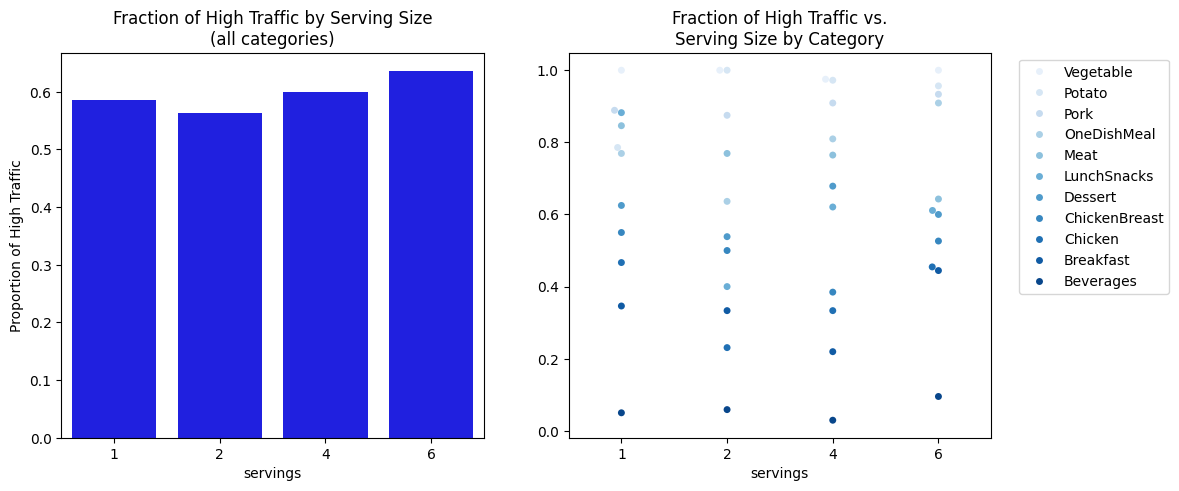

In [27]:
sns.set_palette("Blues")

# put 2 seaborn plots side by side
fig3, ax3 = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df_serv_target, x='servings', y='High_proportion', color='blue', ax=ax3[0])

# Get unique labels for the swarmplot and sort them in reverse alphabetical order
rev_alpha_order = sorted(cat_target_servings_long.index.unique(), reverse=True)

sns.swarmplot(data=cat_target_servings_long, x='servings', y='High_proportion', hue='category',
              hue_order=rev_alpha_order ,palette="Blues", ax=ax3[1])
# reset palette back to default
sns.set_palette("tab10")

ax3[0].set_title('Fraction of High Traffic by Serving Size\n(all categories)')
ax3[1].set_title('Fraction of High Traffic vs.\nServing Size by Category')
ax3[0].set_ylabel('Proportion of High Traffic')
ax3[1].set_ylabel('')
# move legend outside swamplot
ax3[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout
plt.show()

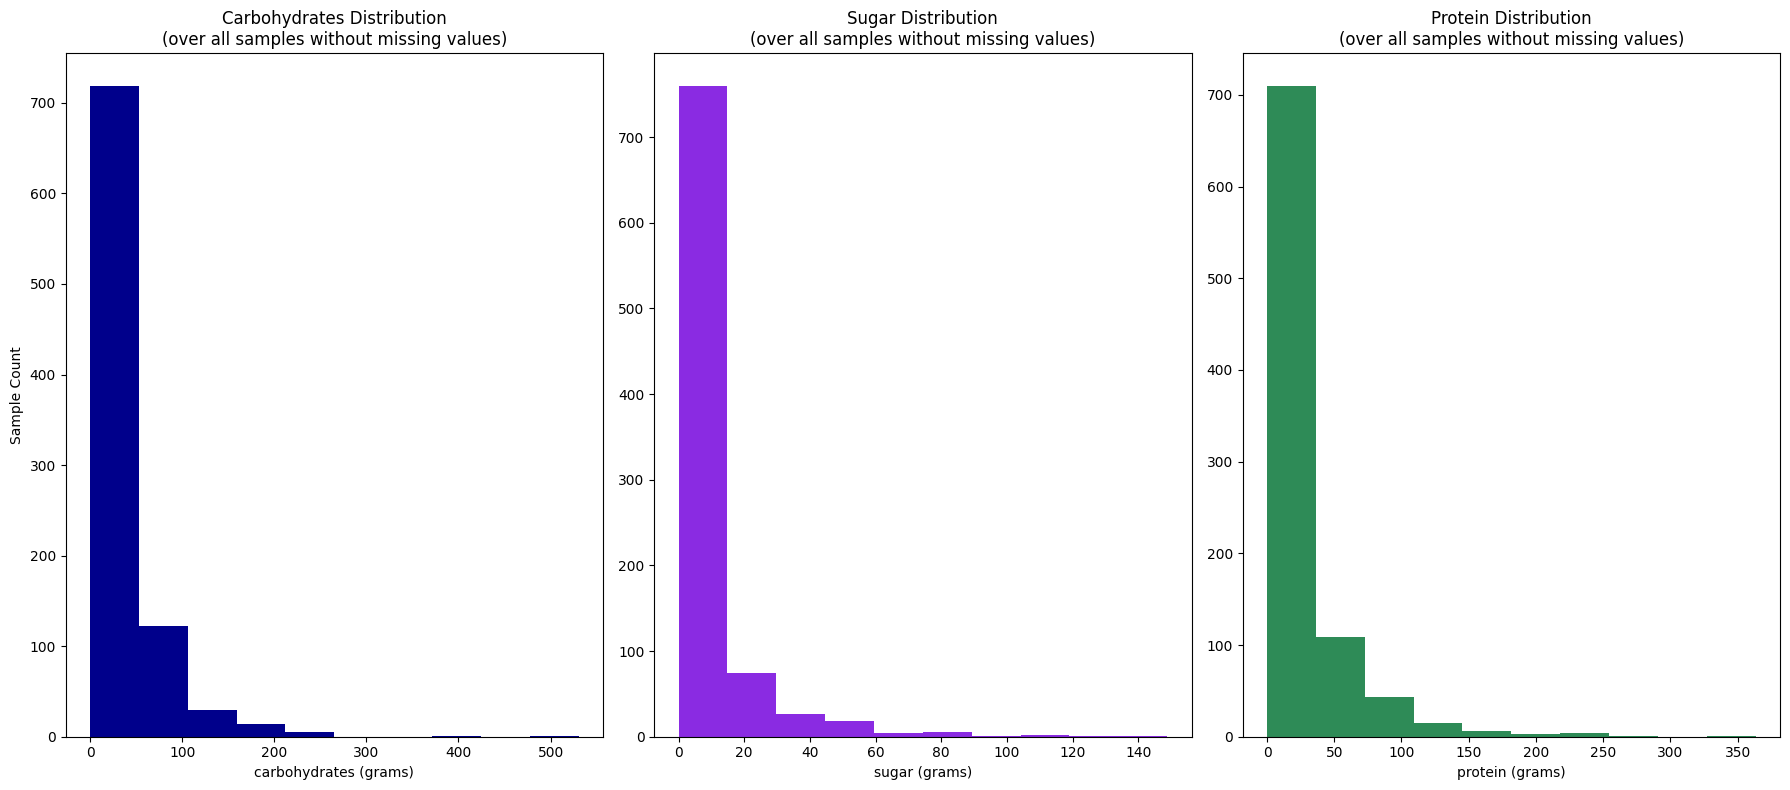

In [28]:
ccsp_colors = ['lightgrey', 'darkblue', 'blueviolet', 'seagreen']
fig1, ax1 = plt.subplots(1, 3, figsize=(18, 8))
# ax1[0].hist(df_no_missing['calories'], color=ccsp_colors[0])
ax1[0].hist(df_no_missing['carbohydrate'], color=ccsp_colors[1])
ax1[1].hist(df_no_missing['sugar'], color=ccsp_colors[2])
ax1[2].hist(df_no_missing['protein'], color=ccsp_colors[3])

ax1[0].set_ylabel('Sample Count')
# ax1[0].set_xlabel('calories')
ax1[0].set_xlabel('carbohydrates (grams)')
ax1[1].set_xlabel('sugar (grams)')
ax1[2].set_xlabel('protein (grams)')

# ax1[0].set_title('Calories Distribution\n(over all samples without missing values)')
ax1[0].set_title('Carbohydrates Distribution\n(over all samples without missing values)')
ax1[1].set_title('Sugar Distribution\n(over all samples without missing values)')
ax1[2].set_title('Protein Distribution\n(over all samples without missing values)')

plt.tight_layout()
plt.show()

In [29]:
df_no_missing.head(2)

,recipe,carbohydrate,sugar,protein,category,servings,high_traffic,non_csp_cals
1,2,38.56,0.66,0.92,Potato,4,High,-125.08
2,3,42.68,3.09,2.88,Breakfast,1,NOT High,719.68


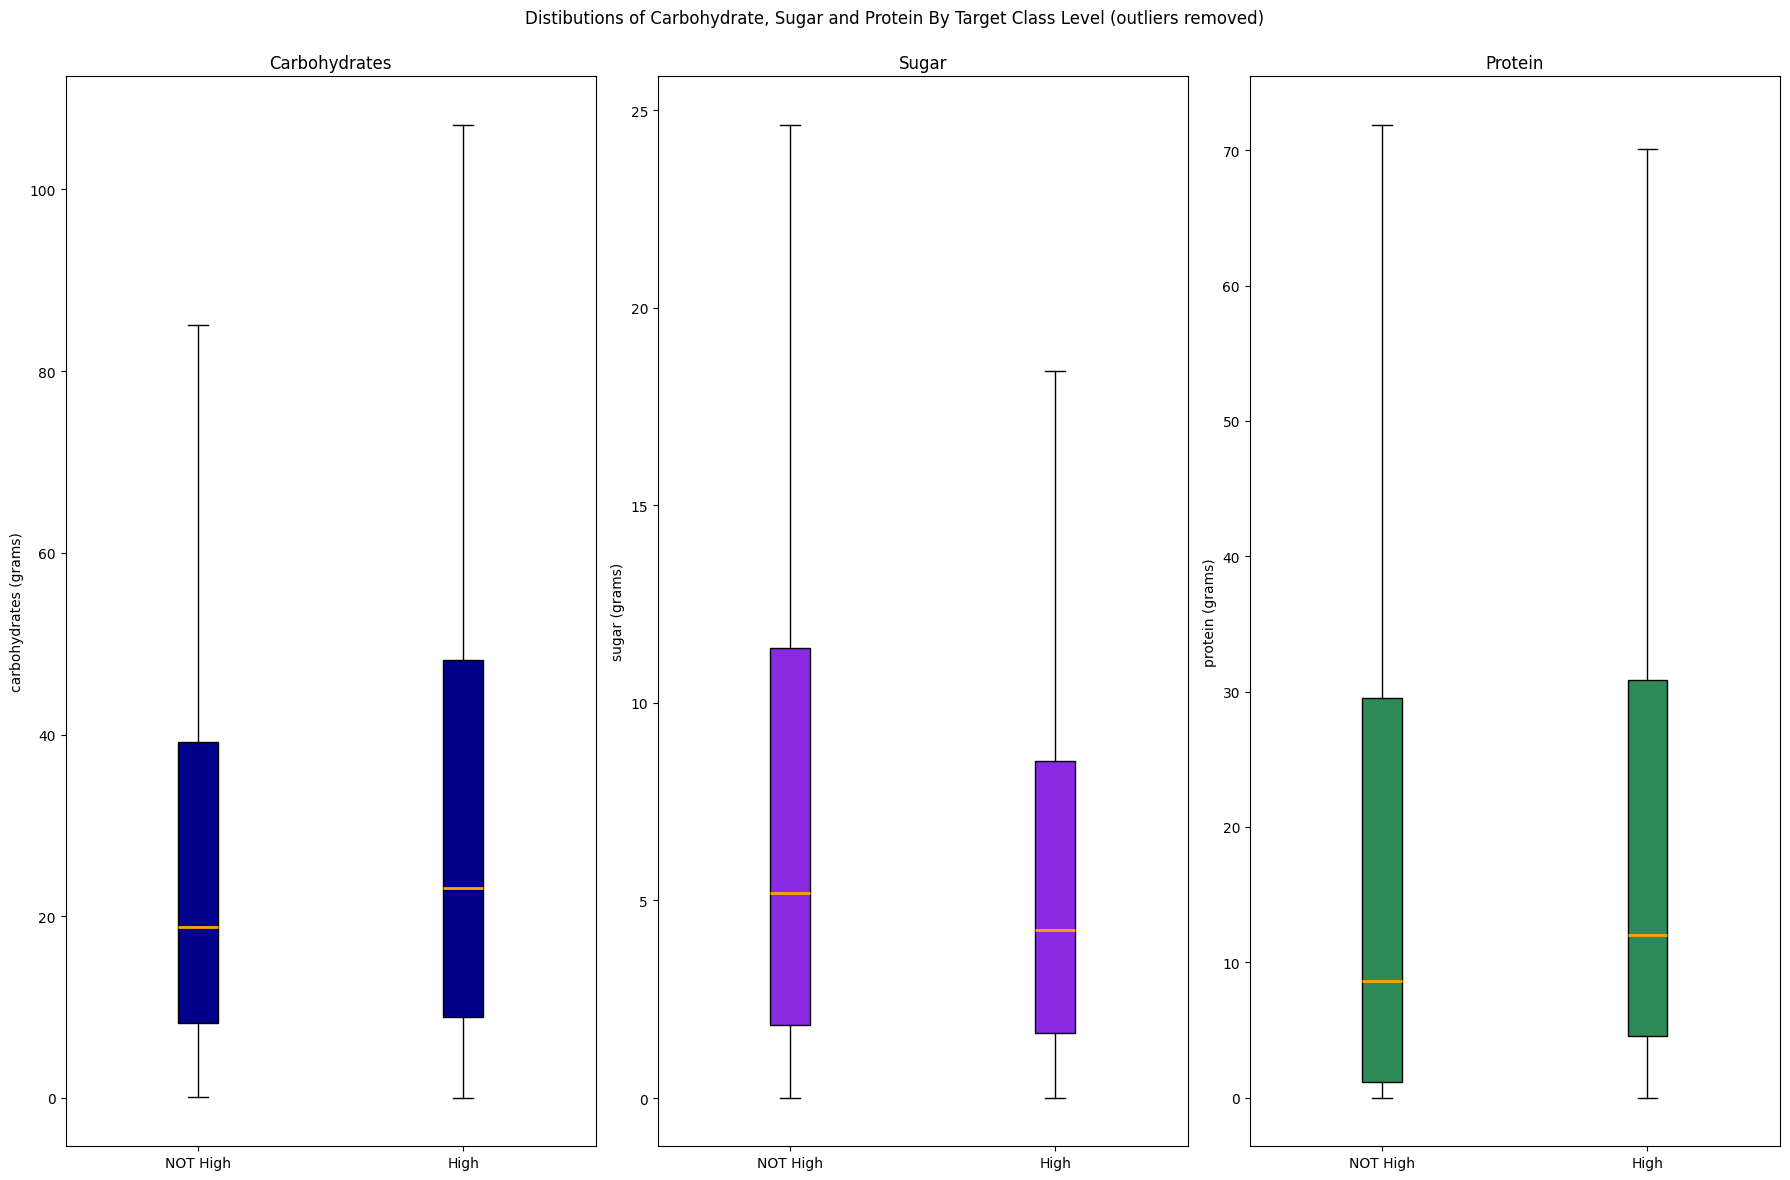

In [30]:
# need individual axis control because carbohydrate, sugar, protien in grams but calories in cals
data_carb_not_high = df_no_missing.loc[df_no_missing['high_traffic'] == 'NOT High', 'carbohydrate']
data_carb_high = df_no_missing.loc[df_no_missing['high_traffic'] == 'High', 'carbohydrate']
# sugar
data_sugr_not_high = df_no_missing.loc[df_no_missing['high_traffic'] == 'NOT High', 'sugar']
data_sugr_high = df_no_missing.loc[df_no_missing['high_traffic'] == 'High', 'sugar']
# protein
data_prot_not_high = df_no_missing.loc[df_no_missing['high_traffic'] == 'NOT High', 'protein']
data_prot_high = df_no_missing.loc[df_no_missing['high_traffic'] == 'High', 'protein']
# calories
# data_cals_not_high = df_no_missing.loc[df_no_missing['high_traffic'] == 'NOT High', 'calories']
# data_cals_high = df_no_missing.loc[df_no_missing['high_traffic'] == 'High', 'calories']

# USE labels instead of tick_labels in older versions of matplotlib
fig2, ax2 = plt.subplots(1, 3, figsize=(18, 12))
# ax2[0].boxplot([data_cals_not_high, data_cals_high], tick_labels=['NOT High', 'High'],
#                showfliers=False, patch_artist=True, boxprops=dict(facecolor=ccsp_colors[0]),
#                medianprops=dict(color='orange', linewidth=2))
ax2[0].boxplot([data_carb_not_high, data_carb_high], tick_labels=['NOT High', 'High'],
               showfliers=False, patch_artist=True, boxprops=dict(facecolor=ccsp_colors[1]),
               medianprops=dict(color='orange', linewidth=2))
ax2[1].boxplot([data_sugr_not_high, data_sugr_high], tick_labels=['NOT High', 'High'],
               showfliers=False, patch_artist=True, boxprops=dict(facecolor=ccsp_colors[2]),
               medianprops=dict(color='orange', linewidth=2))
ax2[2].boxplot([data_prot_not_high, data_prot_high], tick_labels=['NOT High', 'High'],
               showfliers=False, patch_artist=True, boxprops=dict(facecolor=ccsp_colors[3]),
               medianprops=dict(color='orange', linewidth=2))

# ax2[0].set_ylabel('calories / serving size (grams)')
ax2[0].set_ylabel('carbohydrates (grams)')
ax2[1].set_ylabel('sugar (grams)')
ax2[2].set_ylabel('protein (grams)')

# ax2[0].set_title('Calories Distributions by Target Class\n(outliers removed)')
ax2[0].set_title('\nCarbohydrates')
ax2[1].set_title('\nSugar')
ax2[2].set_title('\nProtein')
fig2.suptitle('Distibutions of Carbohydrate, Sugar and Protein By Target Class Level (outliers removed)')

plt.tight_layout()
plt.show()

In [31]:
# create boostrap distribution of mean High-traffic rates
def bootstrap_mean_replicate(data, random_gen): 
    """Generate bootstrap mean of binary vector""" 
    bs_sample = np.random.choice(data, len(data))
    bs_mean = bs_sample.sum() / len(data)
    
    return bs_mean

# test
# traffic_encoded = df_no_missing['high_traffic'].apply(lambda x: 1 if x =="High" else 0)
# print(traffic_encoded[:5])
# print(bootstrap_mean_replicate(traffic_encoded))

In [32]:
# generate bootstrap replicated of the mean
rng = np.random.default_rng(seed=711)  # for repeatability
num_replicates = 10000
bs_replicates = np.empty(num_replicates)
traffic_encoded = df_no_missing['high_traffic'].apply(lambda x: 1 if x =="High" else 0)
# time_start = dt.now()
for i in range(num_replicates):
    bs_replicates[i] = bootstrap_mean_replicate(traffic_encoded, rng)
# time_end = dt.now()
# print(f"Elapsed time creating boostrap distribution: {time_end - time_start}")


Human selection process - 95% confidence interval of mean high traffic: [0.56502242 0.63004484]



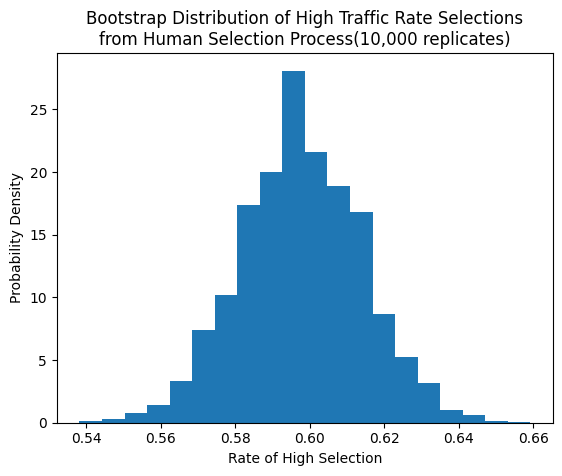

In [33]:
ci_95percent = np.percentile(bs_replicates, [2.5, 97.5])
print(f"\nHuman selection process - 95% confidence interval of mean high traffic: {ci_95percent}\n")
fig4, ax4 = plt.subplots()
ax4.hist(bs_replicates, bins = 20, density=True)
ax4.set_title('Bootstrap Distribution of High Traffic Rate Selections\nfrom Human Selection Process(10,000 replicates)')
ax4.set_xlabel('Rate of High Selection')
ax4.set_ylabel('Probability Density')
plt.show()

### Feature engineering

A model can only perform well if it has informative features to work with. As the next panel of 6 plots indicates, none of the CSP features by themselves creates good separation between the two levels of the target. This means that a model built with these feature will have a hard time distinguishing between the target levels.

Three features based on the original CSP features were created and tested to see if they could produce better separation between the target level (High and NOT High traffic):

$
\begin{align}
&\text{c\_plus\_p\_minus\_s} = \text{carbohydrate} + \text{protein} - \text{sugar} \\\\
&\text{c\_times\_p\_div\_s} = \frac{\text{carbohydrate} \times \text{protein}}{1 + \text{sugar}}  \\\\
&\text{c\_plus\_p\_minus\_s\_2\_div\_s} = \dfrac{(\text{carbohydrate} + \text{protein} - \text{sugar})^2}{1 + \text{sugar}}
\end{align}
$

These feature seemed to create a slight improvement in separating the levels of the target class either. We'll soon see if any of these features improve actual model performance.


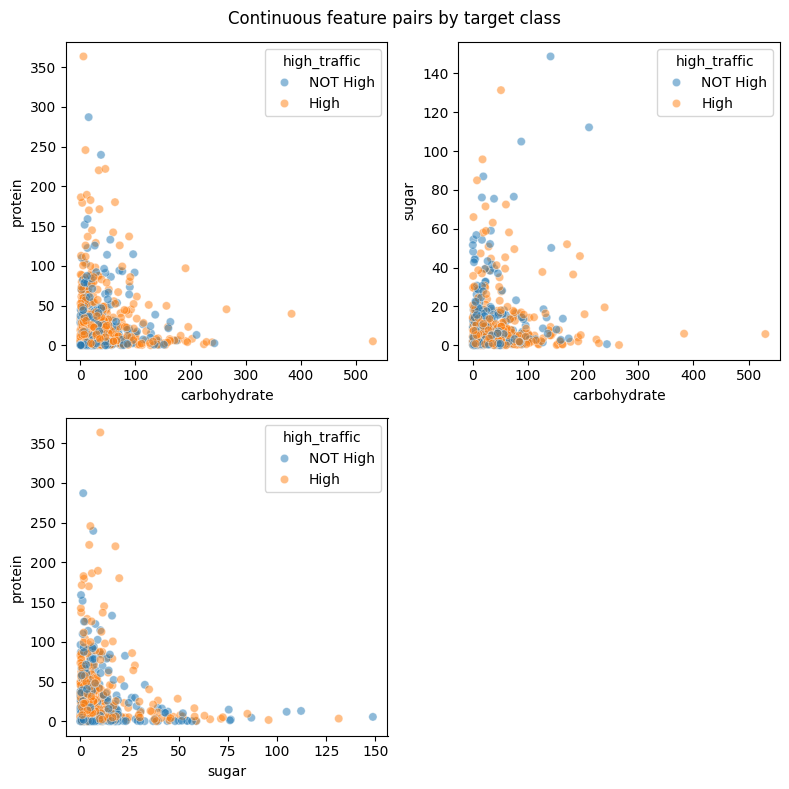

In [34]:
fig5, ax5 = plt.subplots(2, 2, figsize=(8, 8))

sns.scatterplot(data=df_no_missing, x='carbohydrate', y='protein', hue='high_traffic', hue_order=['NOT High', 'High'], alpha=0.5, ax=ax5[0, 0])
sns.scatterplot(data=df_no_missing, x='carbohydrate', y='sugar', hue='high_traffic', hue_order=['NOT High', 'High'], alpha=0.5, ax=ax5[0, 1])
sns.scatterplot(data=df_no_missing, x='sugar', y='protein', hue='high_traffic', hue_order=['NOT High', 'High'], alpha=0.5, ax=ax5[1, 0])
ax5[1, 1].set_visible(False)  # make the unused grid slot empty
fig5.suptitle('Continuous feature pairs by target class')
plt.tight_layout()
plt.show()

In [35]:
# create 3 feature based on the "x Distributions by Target Class"
df_no_missing['c_plus_p_minus_s'] = df_no_missing['carbohydrate'] + df_no_missing['protein'] - df_no_missing['sugar']
df_no_missing['c_times_p_div_s'] = (df_no_missing['carbohydrate'] * df_no_missing['protein']) / (1 + df_no_missing['sugar'])
df_no_missing['c_plus_p_minus_s_2_div_s'] = (df_no_missing['c_plus_p_minus_s'] ** 2) / (1 + df_no_missing['sugar'])
print(df_no_missing.shape)
df_no_missing.head()

(892, 11)


,recipe,carbohydrate,sugar,protein,category,servings,high_traffic,non_csp_cals,c_plus_p_minus_s,c_times_p_div_s,c_plus_p_minus_s_2_div_s
1,2,38.56,0.66,0.92,Potato,4,High,-125.08,38.82,21.370602,907.826747
2,3,42.68,3.09,2.88,Breakfast,1,NOT High,719.68,42.47,30.053399,441.002665
3,4,30.56,38.63,0.02,Beverages,4,High,-179.81,-8.05,0.015423,1.635188
4,5,1.85,0.80,0.53,Beverages,4,NOT High,14.33,1.58,0.544722,1.386889
5,6,3.46,1.65,53.93,OneDishMeal,2,High,454.99,55.74,70.414264,1172.433057


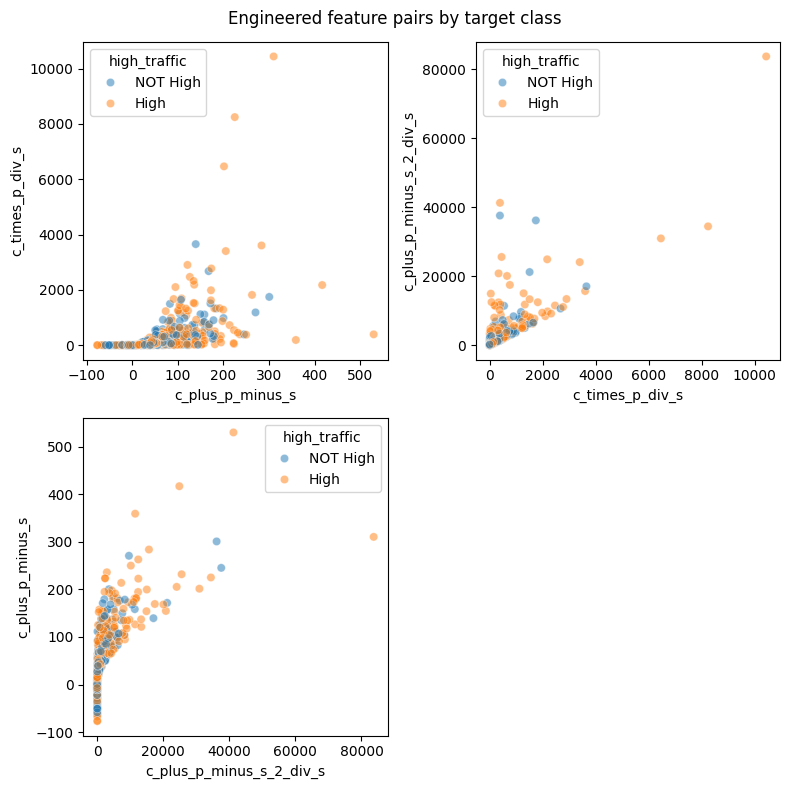

<Figure size 640x480 with 0 Axes>

In [36]:
# Look at 3 engineered features
fig6, ax6 = plt.subplots(2, 2, figsize=(8, 8))

sns.scatterplot(data=df_no_missing, x='c_plus_p_minus_s', y='c_times_p_div_s', hue='high_traffic', hue_order=['NOT High', 'High'], alpha=0.5, ax=ax6[0, 0])
sns.scatterplot(data=df_no_missing, x='c_times_p_div_s', y='c_plus_p_minus_s_2_div_s', hue='high_traffic', hue_order=['NOT High', 'High'], alpha=0.5, ax=ax6[0, 1])
sns.scatterplot(data=df_no_missing, x='c_plus_p_minus_s_2_div_s', y='c_plus_p_minus_s', hue='high_traffic', hue_order=['NOT High', 'High'], alpha=0.5, ax=ax6[1, 0])
ax6[1, 1].set_visible(False)  # make the unused grid slot empty
fig6.suptitle('Engineered feature pairs by target class')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

# Model Development

The problem is framed as a **binary classification** in which we want to predict whether a recipe will generate ***high*** website traffic or not. A **logistic regression** model was selected as the baseline and a **Random Forest classifier** was selected as the comparator model.

## Why logistic regression as baseline?

Logistic regression models serve as a good baseline choice because:

1. they are among the simpliest models available because they seek to learn a linear decision boundary
2. they provide repeatable results (deterministic) when trained on the same data
3. they don't require selecting or tuning any hyperparameters
4. the model coefficients are interpretable
5. they require minimal data to train an effective model

## Why random forest classifier (RFC) as comparator?

Random forest models serve as a good comparator because

1. they are among the more powerfully predictive models
2. they are relatively insensitive to scaling of predictors
3. they learn a complex non-linear decision boundary
4. they derive their power by acting as a ***voting classifier*** aggregating the results of many different decision trees which allows them to make good estimates regarding **feature importance**.
5. with their added predicive power comes the complexity of determining good values for numerous hyperparameters
6. once good hyperparameters are determined, the model can usually (but not always) outperforms simplier models

## Workflow

1. Encode the `high_traffic` categorical variable before any data splitting
2. Split data into training an test sets
3. Impute the missing `carbohydrate`, `sugar` and `protein` training values with the medians within each category
   + Wrangle training and test partitions to facilitate imputation
   + Compute medians per group for each feature ***ONLY from the training set***
   + Impute the Training Set using the medians calc'd on training set
4. Impute the missing `carbohydrate`, `sugar` and `protein` test values ***with the medians computed on the **TRAINING** set***
5. Encode the `category` categorical variable
6. Scale the features
   + Linear models like logistic regression are sensitive to differences in feature scale
   + Random forest models are insensitive to feature scale differences, so scaling should have no effect on model performance
7. Tune the random forest classifier
   + Fist with RandomSeachCV with a relatively wider range of hyperparameters
   + Second with GridSearchCV with a more focused range of hyperparameters
8. Fit each model (logistic regression, RFC with defaults and RFC tunes) using 10-fold cross validation to determine the distribution of their performance metric
9. Compare performance of the LR and RFC models 

## Imputing missing values

Because the missing `carbohydrate`, `sugar` and `protein` values are not distributed normally, a random forest regressor was initially selected for the imputer instead of a linear regression, but I kept getting warnings of failed conversions, so I decided to use the median within each category. In order to prevent data leakage, imputation was done after splitting the data in the training and test sets.

## Model development summary

1. The problem is framed as ***binary classification***. The ***High*** values in the `high_traffic` column represent the positive (1) class while the ***NOT High*** values represent the negative (0) class.
2. Logistic regression (LR) was chosen as the baseline model because it is fast and easy to train with no hyperparameters that need to be determined. An LR learns a linear decision boundary which is repeatable when trained on the same data and performs better than more complex models on small data sets. Because this model is part of the ***generalized linear models*** family, the coefficients that are learned in training are interpretable.
3. A random forest classier (RFC) was selected as the comparator model because it learns a non-linear decision boundary which makes it more likely to outperform models that learn a linear decision boundary on data that have complex relationships between predictors and target.
4. The model development workflow was designed to:
   - train and compare an LR model with an RFC by training each model on 80% of the data provide (train set) and keeping 20% unseen by the model (test set) for performance evaluation
   - scaling the data to address LR sensitivity to differences in feature scale
   - preventing data leakage by doing the imputation of `carbohydrate`, `sugar` and `protein` **after** the train/test split
   - utilize RandomSearchCV and GridSearchCV to zero in on hyperparameters to allow the RFC perform well
   - 10-fold CV to determine the best performing model: <font color="green"><b>LR</b></font> **vs.** <font color="green"><b>RFC with untuned default hyperparameters</b></font> **vs.** <font color="green"><b>RFC with some hyperparameter tuning</b></font>
5. Because the missing data is ***MAR**, values were imputed by the median within each `category`. The main motivation for imputation was to preserve the predictive power in the `category` values for these samples. 


In [37]:
# 1. Encode the `category` and `high_traffic` categorical variables

df_enc = df.drop('category_cat', axis=1)
df_enc['high_traffic'] = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)
df_enc.head()

,recipe,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,Pork,6,1
1,2,38.56,0.66,0.92,Potato,4,1
2,3,42.68,3.09,2.88,Breakfast,1,0
3,4,30.56,38.63,0.02,Beverages,4,1
4,5,1.85,0.80,0.53,Beverages,4,0


In [38]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        944 non-null    int64  
 1   carbohydrate  892 non-null    float64
 2   sugar         892 non-null    float64
 3   protein       892 non-null    float64
 4   category      944 non-null    object 
 5   servings      944 non-null    int64  
 6   high_traffic  944 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 59.0+ KB


In [39]:
# 2. Split data into training an test sets

df_X_all = df_enc.drop(['high_traffic'], axis=1)  # keep recipe for reference, drop later
X = df_X_all.values
y = df_enc['high_traffic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=711, stratify=y)

In [40]:
# 3. Impute the missing `carbohydrate`, `sugar` and `protein` values with a **RandomForestRegressor**
# rf_estimator = RandomForestRegressor(n_estimators=20, random_state=0)
# imputer = IterativeImputer(estimator=rf_estimator, max_iter=100, random_state=0)
# [IterativeImputer] Early stopping criterion not reached.

In [41]:
# 3.1 Wrangle training and test partitions to facilitate imputation
df_X_train = pd.DataFrame(X_train, columns=df_X_all.columns) # convert back to dataframe to make imputation easier
df_X_test = pd.DataFrame(X_test, columns=df_X_all.columns)
# convert float cols back to original dtype
real_features = ['carbohydrate', 'sugar', 'protein']
df_X_train[real_features] = df_X_train[real_features].astype(float)
df_X_test[real_features] = df_X_test[real_features].astype(float)
# convert int cols back to original dtype
df_X_train['servings'] = df_X_train['servings'].astype(int)
df_X_test['servings'] = df_X_train['servings'].astype(int)
# df_X_train.info()
df_X_train.head(2)

,recipe,carbohydrate,sugar,protein,category,servings
0,517,39.05,2.97,23.04,Chicken,4
1,391,89.30,1.61,6.00,Breakfast,4


In [42]:
# 3.2 Compute medians per group for each feature ONLY from the training set
train_medians = [df_X_train.groupby('category')[real_features[0]].median(),
                 df_X_train.groupby('category')[real_features[1]].median(),
                 df_X_train.groupby('category')[real_features[2]].median()]
# 3.3 Impute the Training Set (using the medians calc'd on training set)
df_X_train[real_features[0]] = df_X_train[real_features[0]].fillna(df_X_train['category'].map(train_medians[0]))
df_X_train[real_features[1]] = df_X_train[real_features[1]].fillna(df_X_train['category'].map(train_medians[1]))
df_X_train[real_features[2]] = df_X_train[real_features[2]].fillna(df_X_train['category'].map(train_medians[2]))
# 4. Impute the missing `carbohydrate`, `sugar` and `protein` test values with the medians computed on the TRAINING set
# map() aligns the 'category' in the test dataframe with the index of train_medians
df_X_test[real_features[0]] = df_X_test[real_features[0]].fillna(df_X_test['category'].map(train_medians[0]))
df_X_test[real_features[1]] = df_X_test[real_features[1]].fillna(df_X_test['category'].map(train_medians[1]))
df_X_test[real_features[2]] = df_X_test[real_features[2]].fillna(df_X_test['category'].map(train_medians[2]))
# df_X_train.isna().sum(), df_X_test.isna().sum()  # no missing
# look at imputed test set values - sanity check
# recipes_with_missing = list(df_any_missing['recipe'])
# df_train_had_missing = df_X_train.loc[df_X_train['recipe'].isin(recipes_with_missing), :]
# print(df_train_had_missing)  # these look reasonable

In [43]:
# 5. Encode the `category` variable on training and test sets

df_X_train = pd.get_dummies(df_X_train, columns=['category'])
df_X_test = pd.get_dummies(df_X_test, columns=['category'])
# convert the boolean dummies to 1's and 0's
dt_mapping = {
    'category_Beverages': int,
    'category_Breakfast': int,
    'category_Chicken': int,
    'category_ChickenBreast': int,
    'category_Dessert': int,
    'category_LunchSnacks': int,
    'category_Meat': int,
    'category_OneDishMeal': int,
    'category_Pork': int,
    'category_Potato': int,
    'category_Vegetable': int
}

df_X_train = df_X_train.astype(dt_mapping)
df_X_test = df_X_test.astype(dt_mapping)

In [44]:
# print(df_X_train.shape, df_X_test.shape)
df_X_test.head()

,recipe,carbohydrate,sugar,protein,servings,category_Beverages,category_Breakfast,category_Chicken,category_ChickenBreast,category_Dessert,category_LunchSnacks,category_Meat,category_OneDishMeal,category_Pork,category_Potato,category_Vegetable
0,292,4.79,0.40,5.27,4,0,0,0,1,0,0,0,0,0,0,0
1,261,9.88,5.97,4.83,4,0,1,0,0,0,0,0,0,0,0,0
2,27,51.70,27.78,70.30,1,0,0,0,0,0,0,0,0,1,0,0
3,456,19.50,5.64,28.37,4,0,0,0,0,0,0,0,0,1,0,0
4,776,10.74,2.19,51.99,2,0,0,0,0,0,0,0,0,1,0,0


In [45]:
# df_X_test[real_features]  # 189 rows × 3 columns

In [46]:
# 6. Scale the features

scaler = StandardScaler() 
df_X_train[real_features] = scaler.fit_transform(df_X_train[real_features]) 
df_X_test[real_features] = scaler.transform(df_X_test[real_features])
# drop the recipe col since it's not a feature and servings col because EDA showed it has no significant relationship to the target
df_X_train = df_X_train.drop(['recipe', 'servings'], axis=1)
df_X_test = df_X_test.drop(['recipe', 'servings'], axis=1)
# df_X_test.head()

## Tune the random forest classifier

In [47]:
# 7.1 Tune the random forest classifier
#     Fist with RandomSeachCV with a relatively wider range of hyperparameters

models = {"Logistic Regression": LogisticRegression(),
          "RFC Default": RandomForestClassifier(random_state=711)}

# set up randomize search cv
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False]
}

rf_model = models['RFC Default']

random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist, 
    n_iter=300, 
    scoring='precision',
    n_jobs = -1,
    cv=5, 
    random_state=42
)

time_start = dt.now()
random_search.fit(df_X_train.values, y_train)

# 4. Evaluate the Best Model
best_rf = random_search.best_estimator_
# Note: roc_auc_score requires probabilities, not hard class labels
y_probs = best_rf.predict_proba(df_X_test.values)[:, 1]
# final_precision = precision_score(y_test, y_probs)

time_end =dt.now()

print(f"RandomizedSearchCV elapsed time: {time_end - time_start}")
#        datalab: RandomizedSearchCV elapsed time: 0:02:42.700211
# my workstation: RandomizedSearchCV elapsed time: 0:00:40.288988
print(f"Best RandomizedSearchCV Parameters: {random_search.best_params_}")

RandomizedSearchCV elapsed time: 0:00:38.200527
Best RandomizedSearchCV Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}


In [48]:
# 7.2 Tune the random forest classifier
#     Second with GridSearchCV with a more focused range of hyperparameters

param_grid = {
    'n_estimators': [150, 200, 250, 300, 500],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True, False]
}

# 4. Initialize GridSearchCV
# cv=10 means 10-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=10,
    scoring='precision',
    verbose=0,
    n_jobs=-1
)

time_start = dt.now()
# fit the GridSearchCV to the training data
grid_search.fit(df_X_train.values, y_train)
time_end = dt.now()
print(f"Grid search CV elapsed time: {time_end - time_start}")
# my machine: about  3 minutes
#   datacamp: about 13 minutes

Grid search CV elapsed time: 0:02:44.684163


In [49]:
%%html
<!-- left justify table and add line break below it -->
<style>
table {
    margin-left: 0 !important;
    margin-right: auto !important;
    float: none !important;
}
</style>

# Model Evaluation

## Model selection metric

**Accuracy**, **Precision** and **Recall** are three reasonable metrics to evaluate model performance. The [table below summarizes](https://share.google/aimode/PMEaYppSNYWZbPZZW) when to use each metric. Since the classes are mildly imbalanced, we want to minimize false positive and don't have access to data about false negatives, **precision** was chosen for model selection as it best aligns with the business objective.

| Metric     | Use Case                                   | Goal                                |
|:-----------|:-------------------------------------------|:------------------------------------|
| Accuracy   | Balanced data, equal error costs           | Maximize overall correct predictions|
| Precision  | Imbalanced data, high cost of false alarms | Minimize False Positives            |
| Recall     | High cost of missing a target              | Minimize False Negatives            |

Note the following:

+ ***False Negatives*** in our context is chosing not to post a recipe that would have been high traffic. The data provided doesn't this information, but could be estimated with either of our models.
+ ***False Positives*** in our context is posting a recipe that is **NOT** high traffic.

## Baseline logistic regression (LR) vs. default RF classifier (RFC) vs tuned RF classifier

The LR outperformed both the default and tuned RFC models as shown in the figure titled ***Precision Logistic Regression vs RFC Default vs RFC Tuned***. The tuning of the RFC model was not extensive, but should have improved performance over the default RFC more substantially. The improvement in the tuned RFC implies that the RFC is may not the best choice for this problem.

## Improving precision by adjusting threshold

Although the LR model outperforms both RFC models, it still does not meet the KPI of precision being 80% or better with its default threshold setting. To understand what this means, we need to understand that the LR model model calculates a probability that each sample will be high traffic or not. By default, it predicts ***high*** traffic if this probability is greater than 0.50 (50%). This value of 0.50 is what is referred to as the model's ***threshold*** and can be thought of as how confident we want the model to be in assigning the positive class. In a binary classification problem, having the model predict the ***High*** (positive) class if it computes the probability of being ***High*** greater than 50% is reasonable default behavior.

However, if we want to model to be more confident before it assigns the positive class (***High*** in our case), we can increase the threshold which essentially is telling the model *"I want you to only assign the positive class if you are 60% or 70% or ... confident in your prediction"*. By increasing the prediction threshold, we will increase the number of positive (again, ***High*** in our case) predicitions, however, this comes at the cost of also increase the number of ***High*** traffic recipes that ***we do not publish***.

In the figure titled ***Precision vs. Threshold with 95% Bootstrap CI***, we see that by increasing the threshold to 62%, should allow the model to generate a precision of 80% on average. If we want to predict ***High*** recipes at 80% precision or greater 95% of the time, we'd need to increase the threshold to about 72 or 73%. This would pull our overall average precision up to about 86 to 87%.

## Model evaluation summary

+ **Precision** was the chosen evaluation metric because it directly aligns with the business KPI.
+ RFC performance was about the same regardless of whether the model hyperparameters were tuned or not.
+ The baseline logistic regression model outperformed both tuned and default RFC models on the model selection metric (precision) on unseen test data set.
+ The logistic regression does not meet the KPI (precision) target with default threshold (0.5).
+ Precision can be improved by increasing the threshold
+ To achieve an average of 80% precision, we can increase the threshold from 0.5 default to 0.62.
+ However, if want 80% precision 95% of time, we can increase the threshold to 0.73.

In [50]:
# Evaluate the best model on the held-out test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(df_X_test.values)

In [51]:
# test_accuracy = best_rf_model.score(y_test, y_pred)
# print(f"Test accuracy of the best GridSearchCV model: {test_accuracy}")

# Note: roc_auc_score requires probabilities, not hard class labels
y_probs = best_rf.predict_proba(df_X_test.values)[:, 1]
final_precision = precision_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best GridSearchCV precision score is: {final_precision:.4f}") #


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best GridSearchCV precision score is: 0.7398


## Baseline logistic regression vs. default RF classifier vs tuned RF classifier

In [52]:
# add the tuned RFC to the dict of models
models["RFC Tuned"] = RandomForestClassifier(n_estimators=200, min_samples_split=2,
                                             min_samples_leaf=2, max_depth=50, bootstrap=False)
# rerun 10-fold cv
results_precision = []
for model in models.values(): 
    kf = KFold(n_splits=10, random_state=711, shuffle=True) 
    cv_results_prec = cross_val_score(model, df_X_train.values, y_train, scoring='precision', cv=kf)
    results_precision.append(cv_results_prec)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1880\2973915300.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax_m2[0].boxplot(results_precision, labels=models.keys())


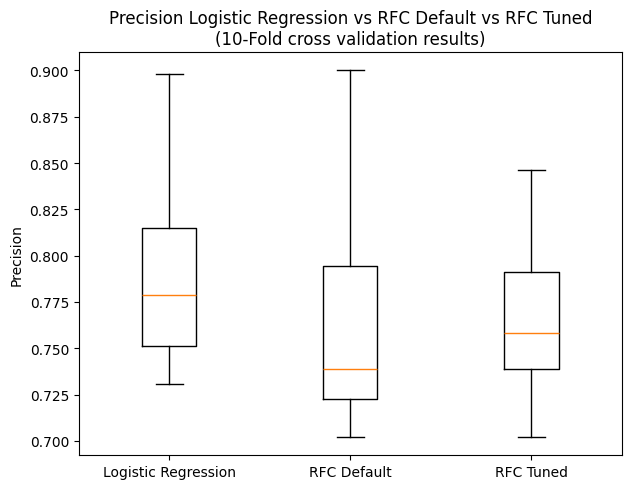

median Precision for Logistic Regression: 0.778888888888889
median Precision for RFC with defaults  : 0.7390070921985815
median Precision for RFC tuned  : 0.7579858030168589


In [53]:
fig_m2, ax_m2 = plt.subplots(1, 2, figsize=(12, 5))
# roc auc
ax_m2[0].boxplot(results_precision, labels=models.keys())
ax_m2[0].set_title("Precision Logistic Regression vs RFC Default vs RFC Tuned\n(10-Fold cross validation results)")
ax_m2[0].set_ylabel("Precision")
ax_m2[1].set_visible(False)

plt.tight_layout()
plt.show()

print(f"median Precision for Logistic Regression: {np.median(results_precision[0])}")
print(f"median Precision for RFC with defaults  : {np.median(results_precision[1])}")
print(f"median Precision for RFC tuned  : {np.median(results_precision[2])}")


In [54]:
# train final logistic regression model on training set
log_reg = LogisticRegression()
log_reg.fit(df_X_train.values, y_train)
# evaluate on unseen test set
y_pred = log_reg.predict(df_X_test.values)
log_reg_test_precision = precision_score(y_test, y_pred)
print(f"Precision of logistic regression model on unseen test data: {log_reg_test_precision:.4f}")
print(f"                        Precision of human selection model: {np.mean(bs_replicates):.4f}")

Precision of logistic regression model on unseen test data: 0.7863
                        Precision of human selection model: 0.5977


## Improving precision by adjusting threshold

In [55]:
thresholds = [0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80]
n_iterations = 1000
bs_results = {thresh: [] for thresh in thresholds}
# only need to do next line once
probs = log_reg.predict_proba(df_X_test.values)[:, 1]  # 1st row 0 (not high) class, 2nd row 1 (high) class

# generate bootstrap samples to estimate uncertainty in precision at each threshold
for it in range(n_iterations):
    # resample indices with replacement
    inds = resample(range(len(y_test)))
    # safety mechanism to protect against difference between pandas & numpy
    y_test_resampled = y_test.iloc[inds] if hasattr(y_test, 'iloc') else y_test[inds]
    probs_resampled = probs[inds]

    for thresh in thresholds:
        y_pred_thresh = (probs_resampled >= thresh).astype(int)
        # compute precision based on this threhold, handle div by 0 when no sample meet threshold
        precision_thresh = precision_score(y_test_resampled, y_pred_thresh, zero_division=0)
        # tally results
        bs_results[thresh].append(precision_thresh)

In [56]:
# iterate through the precision values computed over each bootstrap iteration
low_bound_precs = []
high_bound_precs = []
mean_precs = []
# print header
print(f"Threshold    | Mean Precision  | 95% Confidence Iinterval")
print(f"-------------|-----------------|-------------------------")
for thresh in thresholds:
    prec_values = bs_results[thresh]
    prec_lower = np.percentile(prec_values, 2.5)
    prec_upper = np.percentile(prec_values, 97.5)
    prec_mean = np.mean(prec_values)
    # store results so we can plot them later
    low_bound_precs.append(prec_lower)
    high_bound_precs.append(prec_upper)
    mean_precs.append(prec_mean)
    # print results
    print(f"{thresh:<12.2f} | {prec_mean:<15.4f} | [{prec_lower:.4f}, {prec_upper:.4f}]")

Threshold    | Mean Precision  | 95% Confidence Iinterval
-------------|-----------------|-------------------------
0.50         | 0.7866          | [0.7063, 0.8560]
0.55         | 0.7847          | [0.7034, 0.8559]
0.60         | 0.7980          | [0.7182, 0.8707]
0.65         | 0.8221          | [0.7387, 0.8941]
0.70         | 0.8508          | [0.7700, 0.9222]
0.75         | 0.9325          | [0.8596, 0.9841]
0.80         | 0.9474          | [0.8852, 1.0000]


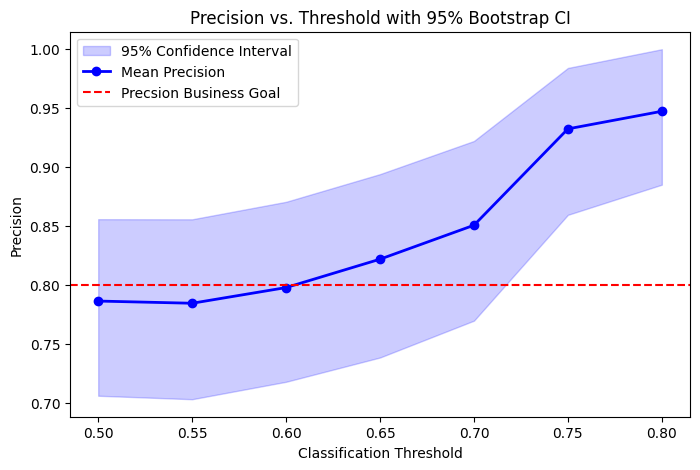

In [57]:
# plot results
plt.figure(figsize=(8, 5))

# Plot the shaded 95% CI band
plt.fill_between(thresholds, low_bound_precs, high_bound_precs, color='blue', alpha=0.2, label='95% Confidence Interval')

# Plot the mean precision line
plt.plot(thresholds, mean_precs, color='blue', marker='o', linewidth=2, label='Mean Precision')

# Formatting
plt.title('Precision vs. Threshold with 95% Bootstrap CI')
plt.xlabel('Classification Threshold')
plt.ylabel('Precision')
# add red dashed line to show 80% goal
plt.axhline(y=0.8, color='red', linestyle='--', linewidth=1.5, label='Precsion Business Goal')
plt.legend(loc="upper left")
plt.show()

# Business Metrics

## Model performance measured by precision

Management has stated that ***"More traffic means more subscriptions so this is really important to the company."*** This implies that **subscription rate** is an important metric or KPI (key performance indicator). Increasing subscription rate increases company revenue. However, without knowing what we charge for a subscription or the relationship between website traffic and subscription rate, this analysis focused on the stated objective to ***"predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes".*** 

This ***80% popular*** objective implies that the cost of a false positive (posting a recipe we think will be high traffic, but is not) is **much greater** than the cost of a false negative (not posting a recipe that would have been high traffic). In other words, we are more ok with missed high traffic recipes as long as this results in selecting a higher rate of high traffic recipes.

Given this objecive, the appropriate metric for this project is **precision** because it perfectly aligns with the business KPI. In our business, this metric is defined as the number of high traffic recipes we selected divided by the number of recipes ***we predict as being high traffic***. The number that we ***we predict as being high traffic*** will be the sum of recipes we predict as high and were found to be high plus the recipes we predict as high but were not. This can be expressed as the following ratio:

$
\begin{align}
&\text{precision} = \dfrac{\text{(high traffic recipes selected)}}{\text{(high traffic recipes selected)} + \text{(NOT high traffic recipes selected)}}
\end{align}
$

### Model performance on the test set

The LR model can reach the precision objective by increasing the threshold of prediction as describe in a previous section to either 0.62 to reach an 80% average precision or 0.72 if want the average to be met 95% of the time. This choice depends on the how much volitilty in the precision is tolerable by the business and the actual cost associated with essentially dropping some ***High*** traffic recipies from consideration.

## Business metrics summary

1. The machine learning metric known as ***precision*** aligns perfectly with the KPI of increased subscription rate.
2. The final LR model outpeformed both RFC models and came very close to the precision goal of 80% with the default prediction theshold of 0.50, but fell just short by about 1.5%
3. To reach the 80% precision objective an average, the prediction threshold of the LR model needs to be increase from 0.5 to 0.62 or greater.
4. In order to reach an average 80% precision 95% of the time, the prediction threshold needs to be increased to 0.72 which would drive the average precision up to about 87%.
5. Increasing the prediction threshold comes at the cost of throwing out or ignoring an increasing number of recipes that would have been ***High*** traffic had they been published.

# Final Summary and Recommendations

## Data Validation Summary

+ The data set provide contained 947 records/samples/rows and 8 features/columns. Three records were dropped due to inconsistent values in the `servings` column.
+ The target (variable we want to predict) was in the `high_traffic` column and contained 373 missing values. Missing values in this column were imputed with the string ***NOT High*** because we assumed that these were recipes that did not produce high traffic.
+ The target classes were slightly imbalanced with 573 ***High*** traffic sames compared to 373 ***NOT High*** samples.
+ The data contained missing values for `calories`, `carbohydrate`, `sugar` and `protein` which always occurred together and occurred in 5.5% of the samples. These values were ***Missing at Random (MAR)*** and were imputed using the median within each `category`.
+ The calories from the `carbohydrate`, `sugar` and `protein` columns added together exceeded the total calories in the `calories` column in 376 samples. The `carbohydrate`, `sugar` and `protein` values were assumed to be accurate while the `calories` values were dropped under the assumption that they were incorrect. These assumptions were made in order to make the analysis less trivial.
+ There were 11 categories found in the `category` column instead of the 10 specified in the documentation. The extra category found was `Chicken Breast` and was assumed to be different (mutually exclusive) from the `Chicken` category.

## Exploratory Data Analysis Summary

+ Recipe counts were distributed relatively evenly across categories
+ `category` was the most informative feature in terms of predicting traffic
+ `servings`was not an informative feature in terms of predicting traffic
+ The 95% confidence interval of the current process is between 56.5% to 63% which is well below the 80% precision goal.
+ The `carbohydrate`, `sugar` and `protein` features may have contributed slightly to model prediction preformance
+ Three engineered features based on combinations of `carbohydrate`, `sugar` and `protein` values were derived and evaluated. However, none of them appeared to be very useful in predicting traffic.

## Model Development & Evauation Summary

+ A logistic regression (LR) model was selected as the baseline and a random forest classifier (RFC) was selected as the comparator model
+ The LR model outperformed both a default RFC and an RFC that had some tuning based on the metric of precision
+ None of the model could reach the 80% average precision target using the default prediction threshold of 0.5, although LR model came close
+ The LR model could reach the precision target by increasing the prediction threshold to 0.62 or greater

## Business Metrics Summary

+ The precsion metric corresponds perfectly to the KPI described in the documentation
+ As mentioned in the previous section, the LR model could reach an average precision of 80% by increasing the prediction threshold from 0.5 to 0.62 or greater. However, this increased precision comes at the cost of throwing out recipes that would have been ***High*** traffic had they been published.
+ The higher the prediction threshold is set, the more recipes which would have been ***High*** traffic get dropped from consideration.
+ Based on the way the business problem was described in the documentation, the cost of dropping ***High*** traffic recipes was very low relative to the cost of posting recipes that are ***NOT High*** traffic.

## Recommendations

+ Quantify the relationship between website traffic and subscription rate if we don't know this already. We know that *"More traffic means more subscriptions"*, but how much does subscription rate increase with increased traffic?
+ Identify the source of the missing grouped `calories`, `carbohydrate`, `sugar` and `protein` values.
+ Investigate the cause of the inconsistencies between the `calories`, `carbohydrate`, `sugar` and `protein` values.
+ Verify if the `Chicken` and `Chicken Breast` categories are truly mutually exclusive. If they are not, they should be combined and the model rebuilt.
+ Implement the LR on a provisional basis as soon as feasibly possible.
+ In the meantime, before the LR model is implemented, improve the current ***Human selection process*** to predict high traffic recipes over 80% on average by simply selecting recipes from the following 5 categories listed below. This could done immediately to improve precision of the current process assuming the cost of dropping some ***High*** traffic recipes is low.
  + Vegetable
  + Potato
  + Pork
  + One Dish Meal
  + Meat
+ Determining the true cost of throwing out a ***High*** traffic recipe would allow a more informed choice of how to use either the model developed in this project or the current ***Human selection process***.
+ Evaluate recipes that were dropped from consideration under the current process using the LR model and identify high traffic recipes that were previously passed over.
+ Additional data about each recipe could be used to improve future model performance. If we don't have this data already, we should collect additional data on each recipe such as:
  - fat content
  - fiber content
  - time to prepare
  - feedback from users as to why they like or dislike a recipe
